In [55]:
import pandas as pd
import shap

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from baseline_package.base_predictor import BasePredictor

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
d_path = "dataset/preprocessed.csv"
r_path = "dataset/resampled.csv"

In [3]:
rsf = RandomForestClassifier()

param_grid_rsf = {
    'criterion' : ['entropy','log_loss'],
    'n_estimators' : [50,100,120,150],
    'max_depth' : [None],
    'min_samples_split' : [4,5,6],
    'min_samples_leaf' : [2,3,4],
    'max_leaf_nodes' : [None],
    'bootstrap' : [False],
    'max_features' : ['sqrt','log2'],
    'min_weight_fraction_leaf' : [0.0],
    'class_weight' : [{0:1, 1:5},'balanced'],
    'warm_start' : [False],
    'ccp_alpha' : [0.005,0.01]
}

bp_rsf = BasePredictor(model = rsf, d_path = d_path, param_grid = param_grid_rsf, n_splits = 5)
bp_rsf.run(features = None, select_path = None)

In [4]:
bp_rsf.sens

[59.523809523809526,
 40.476190476190474,
 40.476190476190474,
 57.14285714285714,
 76.19047619047619]

In [5]:
bp_rsf.specs

[76.51006711409396,
 92.28187919463086,
 92.28187919463086,
 89.59731543624162,
 74.16107382550335]

In [6]:
bp_rsf.best_params

{'bootstrap': False,
 'ccp_alpha': 0.005,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'warm_start': False}

In [7]:
bp_rsf.confs

[array([[228,  70],
        [ 17,  25]]),
 array([[275,  23],
        [ 25,  17]]),
 array([[275,  23],
        [ 25,  17]]),
 array([[267,  31],
        [ 18,  24]]),
 array([[221,  77],
        [ 10,  32]])]

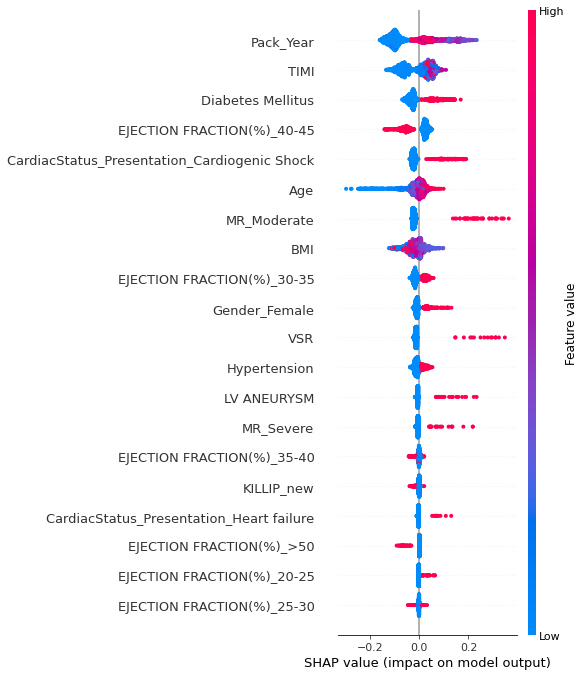

In [56]:
rsf_shap = shap.TreeExplainer(bp_rsf.model)
shap_vals = rsf_shap.shap_values(bp_rsf.data['X'])

shap.summary_plot(shap_vals[1],bp_rsf.data['X'].astype('float64'))

In [8]:
rsf = RandomForestClassifier()

param_grid_rsf_re = {
    'criterion' : ['entropy','log_loss'],
    'n_estimators' : [50,70,100,120,150],
    'max_depth' : [None],
    'min_samples_split' : [4,5,6],
    'min_samples_leaf' : [2,3,4],
    'max_leaf_nodes' : [None],
    'bootstrap' : [False],
    'max_features' : ['sqrt','log2'],
    'min_weight_fraction_leaf' : [0.0],
    'class_weight' : [{0:1, 1:5},'balanced'],
    'warm_start' : [False],
    'ccp_alpha' : [0.005,0.01]
}

bp_rsf_resampled = BasePredictor(model = rsf, d_path = r_path, param_grid = param_grid_rsf_re, n_splits = 5)
bp_rsf_resampled.run(features = None, select_path = None)

In [9]:
bp_rsf_resampled.sens

[87.0, 83.5, 86.0, 81.5, 82.5]

In [10]:
bp_rsf_resampled.specs

[78.5, 82.5, 86.0, 87.0, 87.5]

In [11]:
bp_rsf_resampled.confs

[array([[157,  43],
        [ 26, 174]]),
 array([[165,  35],
        [ 33, 167]]),
 array([[172,  28],
        [ 28, 172]]),
 array([[174,  26],
        [ 37, 163]]),
 array([[175,  25],
        [ 35, 165]])]

In [12]:
bp_rsf_resampled.best_params

{'bootstrap': False,
 'ccp_alpha': 0.005,
 'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 120,
 'warm_start': False}

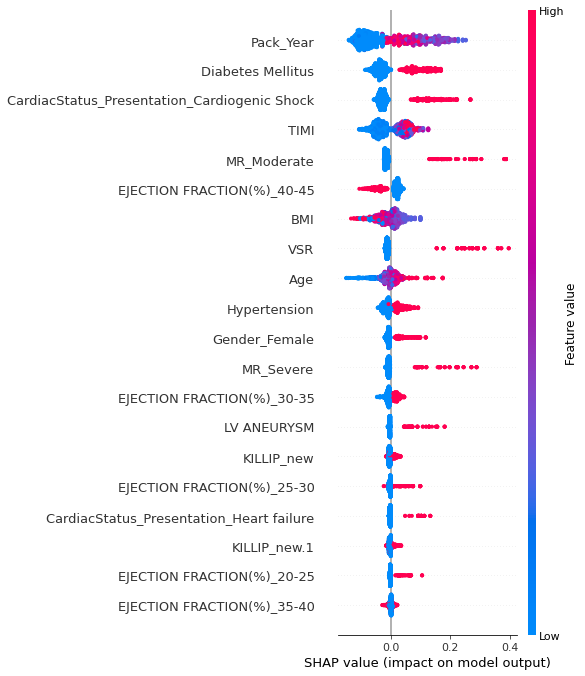

In [60]:
rsf_shap_re = shap.TreeExplainer(bp_rsf_resampled.model)
shap_vals = rsf_shap_re.shap_values(bp_rsf_resampled.data['X'])

shap.summary_plot(shap_vals[1],bp_rsf_resampled.data['X'].astype('float64'))

In [13]:
log_r = LogisticRegression()

param_grid_logr = {
    'penalty' : ['l2'],
    'dual' : [False],
    'tol' : [1e-3,1e-4],
    'C' : [0.3,0.29,0.28,0.277,0.275,0.274,0.273,0.27],
    'fit_intercept' : [True],
    'class_weight' : [{0:1, 1:42},{0:1,1:20},'balanced'],
    'solver' : ['lbfgs','newton-cg'],
    'max_iter' : [5000,1000],
    'warm_start' : [False],
    'n_jobs' : [None        ],
    'multi_class' : ['auto'],
    'l1_ratio' : [None],
}

bp_logr = BasePredictor(model = log_r, d_path = d_path, param_grid = param_grid_logr, n_splits = 5)
bp_logr.run(features = None, select_path = None)

In [14]:
bp_logr.sens

[73.80952380952381,
 54.761904761904766,
 47.61904761904761,
 64.28571428571429,
 83.33333333333334]

In [15]:
bp_logr.specs

[72.81879194630872,
 85.57046979865773,
 87.58389261744966,
 80.20134228187919,
 65.77181208053692]

In [16]:
bp_logr.best_params

{'C': 0.28,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'solver': 'lbfgs',
 'tol': 0.001,
 'warm_start': False}

In [17]:
bp_logr.confs

[array([[217,  81],
        [ 11,  31]]),
 array([[255,  43],
        [ 19,  23]]),
 array([[261,  37],
        [ 22,  20]]),
 array([[239,  59],
        [ 15,  27]]),
 array([[196, 102],
        [  7,  35]])]

In [32]:
log_r = LogisticRegression()

param_grid_logr_re = {
    'penalty' : ['l2'],
    'dual' : [False],
    'tol' : [1e-3,1e-4],
    'C' : [0.7,0.65,0.64,0.63,0.62,0.61,0.6,0.59,0.58,0.57,0.56,0.55,0.5],
    'fit_intercept' : [True],
    'class_weight' : [{0:1, 1:5},{0:1,1:2},'balanced'],
    'solver' : ['lbfgs','newton-cg'],
    'max_iter' : [5000,1000],
    'warm_start' : [False],
    'n_jobs' : [None],
    'multi_class' : ['auto'],
    'l1_ratio' : [None],
}

bp_logr_resampled = BasePredictor(model = log_r, d_path = r_path, param_grid = param_grid_logr_re, n_splits = 5)
bp_logr_resampled.run(features = None, select_path = None)

In [33]:
bp_logr_resampled.sens

[66.5, 62.5, 73.5, 70.0, 63.5]

In [34]:
bp_logr_resampled.specs

[79.5, 81.5, 78.5, 80.5, 83.0]

In [35]:
bp_logr_resampled.confs

[array([[159,  41],
        [ 67, 133]]),
 array([[163,  37],
        [ 75, 125]]),
 array([[157,  43],
        [ 53, 147]]),
 array([[161,  39],
        [ 60, 140]]),
 array([[166,  34],
        [ 73, 127]])]

In [36]:
bp_logr_resampled.best_params

{'C': 0.6,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'solver': 'lbfgs',
 'tol': 0.001,
 'warm_start': False}

In [37]:
etc = ExtraTreesClassifier()

param_grid_etc = {
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [None],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [2,3],
    'min_weight_fraction_leaf' : [0.0],
    'max_features' : ['sqrt','log2'],
    'max_leaf_nodes' : [None],
    'min_impurity_decrease' : [0.0],
    'bootstrap' : [True, False],
    'class_weight' : [{0:1,1:5},'balanced'],
    'warm_start' : [False],
    'ccp_alpha' : [0.007,0.005],
    'random_state' : [0]
}

bp_etc = BasePredictor(model = etc, d_path = d_path, param_grid = param_grid_etc, n_splits = 5)
bp_etc.run(features = None, select_path = None)

In [38]:
bp_etc.sens

[61.904761904761905,
 47.61904761904761,
 40.476190476190474,
 69.04761904761905,
 85.71428571428571]

In [39]:
bp_etc.specs

[77.85234899328859,
 94.63087248322147,
 91.94630872483222,
 86.91275167785236,
 72.14765100671141]

In [40]:
bp_etc.confs

[array([[232,  66],
        [ 16,  26]]),
 array([[282,  16],
        [ 22,  20]]),
 array([[274,  24],
        [ 25,  17]]),
 array([[259,  39],
        [ 13,  29]]),
 array([[215,  83],
        [  6,  36]])]

In [41]:
bp_etc.best_params

{'bootstrap': False,
 'ccp_alpha': 0.005,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'warm_start': False}

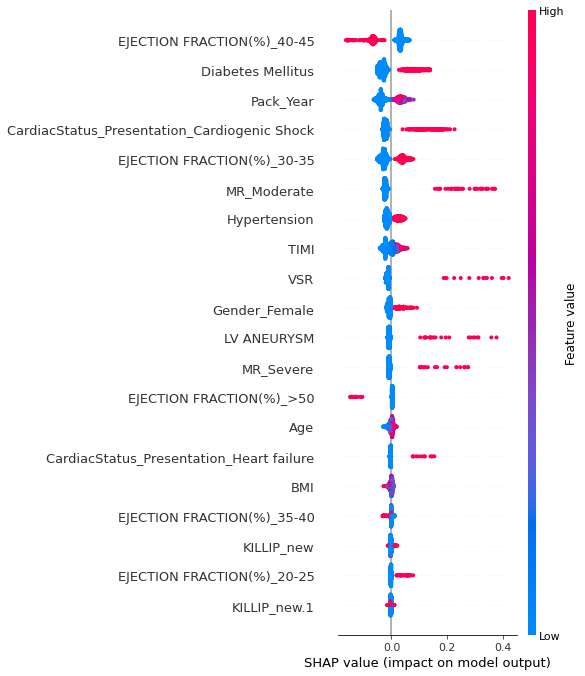

In [61]:
etc_shap = shap.TreeExplainer(bp_etc.model)
shap_vals = etc_shap.shap_values(bp_etc.data['X'])

shap.summary_plot(shap_vals[1],bp_etc.data['X'].astype('float64'))

In [42]:
etc = ExtraTreesClassifier()

param_grid_etc_re = {
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [None],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2],
    'min_weight_fraction_leaf' : [0.0],
    'max_features' : ['sqrt','log2'],
    'max_leaf_nodes' : [None],
    'min_impurity_decrease' : [0.0],
    'bootstrap' : [True, False],
    'class_weight' : [{0:1,1:5},'balanced'],
    'warm_start' : [False],
    'ccp_alpha' : [0.0,0.005],
    'random_state' : [0]
}

bp_etc_resampled = BasePredictor(model = etc, d_path = r_path, param_grid = param_grid_etc_re, n_splits = 5)
bp_etc_resampled.run(features = None, select_path = None)

In [43]:
bp_etc_resampled.sens

[99.0, 98.5, 98.5, 100.0, 100.0]

In [44]:
bp_etc_resampled.specs

[95.5, 95.5, 95.0, 96.5, 96.5]

In [45]:
bp_etc_resampled.confs

[array([[191,   9],
        [  2, 198]]),
 array([[191,   9],
        [  3, 197]]),
 array([[190,  10],
        [  3, 197]]),
 array([[193,   7],
        [  0, 200]]),
 array([[193,   7],
        [  0, 200]])]

In [46]:
bp_etc_resampled.best_params

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 5},
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'warm_start': False}

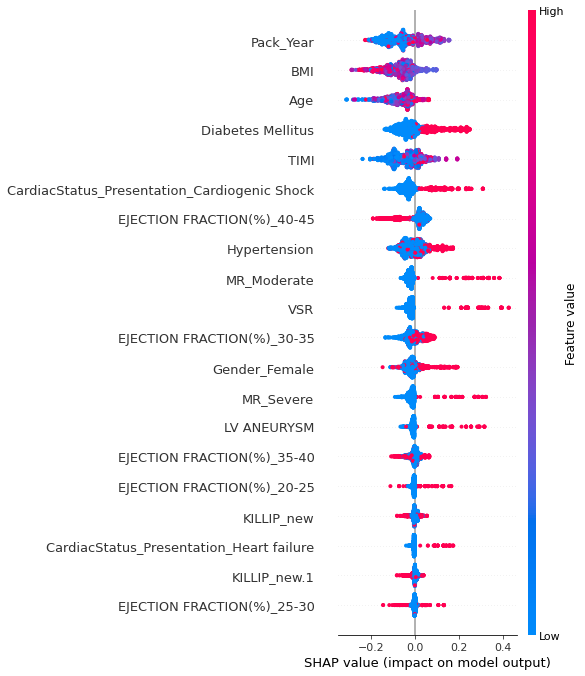

In [62]:
etc_shap_re = shap.TreeExplainer(bp_etc_resampled.model)
shap_vals = etc_shap_re.shap_values(bp_etc_resampled.data['X'])

shap.summary_plot(shap_vals[1],bp_etc_resampled.data['X'].astype('float64'))

In [47]:
results = []

In [49]:
results.append(["RSF", sum(bp_rsf.sens)/5, sum(bp_rsf.specs)/5, sum(bp_rsf_resampled.sens)/5, sum(bp_rsf_resampled.specs)/5])

In [50]:
results.append(["ExtraTree", sum(bp_etc.sens)/5, sum(bp_etc.specs)/5, sum(bp_etc_resampled.sens)/5, sum(bp_etc_resampled.specs)/5])

In [51]:
results.append(["LogR", sum(bp_logr.sens)/5, sum(bp_logr.specs)/5, sum(bp_logr_resampled.sens)/5, sum(bp_logr_resampled.specs)/5])

In [52]:
df_results = pd.DataFrame(data=results,
            columns=["Model","Sensitivity (w/o resampling)","Specificity (w/o resampling)","Sensitivity (w/ resampling)","Specificity (w/ resampling)"])

In [53]:
df_results.to_excel("results/traditional_model_results.xlsx")